# Seria "Early Stopping" uma forma de Regularização? 

Essa dúvida levantada por um aluno surgiu após o “Fundamentos Técnicos de LLMs 

Conceitos de Overfitting, Underfitting e Regularização 

**Você está certo ao dizer que o Early Stopping ajuda a reduzir o overfitting, mas há uma discussão sobre se ele deve ser classificado como regularização.
A regularização, de forma geral, refere-se a técnicas que modificam o processo de aprendizado do modelo para penalizar a complexidade excessiva e, assim, melhorar a generalização. Alguns exemplos são L1 e L2 regularization, que adicionam um termo de penalidade diretamente à função de custo do modelo.
Por outro lado, o Early Stopping atua monitorando o desempenho do modelo em um conjunto de validação e interrompendo o treinamento quando o desempenho começa a piorar, o que geralmente indica que o modelo está começando a se ajustar demais aos dados de treinamento (overfitting). Embora o Early Stopping ajude a prevenir overfitting, ele não impõe uma penalidade à função de custo diretamente, como as regularizações tradicionais. Em vez disso, controla o tempo de treinamento.
Por isso, alguns podem argumentar que o Early Stopping não é uma forma de regularização "clássica", mas sim uma técnica de controle durante o processo de treinamento. No entanto, ainda pode ser considerado uma técnica de regularização no sentido mais amplo, já que reduz a capacidade do modelo de superajustar aos dados de treinamento**

Aqui está o texto formatado em markdown:

# Early Stopping como Forma de Regularização

## Conceitos Básicos

Antes de abordarmos o Early Stopping, vamos relembrar alguns conceitos fundamentais:

1. **Overfitting**: Ocorre quando um modelo aprende não apenas os padrões dos dados de treinamento, mas também o ruído. Isso resulta em um desempenho ruim em dados novos.

2. **Regularização**: Conjunto de técnicas utilizadas para reduzir o overfitting, adicionando restrições ou penalidades ao modelo para melhorar sua capacidade de generalização.

## O que é Early Stopping?

O Early Stopping é uma técnica que interrompe o treinamento do modelo quando o desempenho em um conjunto de validação começa a piorar. A ideia é parar antes que o modelo comece a se ajustar demais aos dados de treinamento.

## Early Stopping é uma forma de Regularização?

Essa é uma questão interessante! Embora o Early Stopping não adicione penalidades explícitas à função de perda, como as regularizações L1 ou L2, ele controla a complexidade efetiva do modelo ao limitar o tempo de treinamento.

### Prós e Contras

- **Pró**: O Early Stopping evita que o modelo continue aprendendo padrões específicos dos dados de treinamento que não generalizam bem, semelhante ao objetivo da regularização.

- **Contra**: Não modifica a função de custo ou adiciona termos de penalidade diretamente, como as técnicas clássicas de regularização.

### Por isso

Muitos especialistas consideram o Early Stopping como uma forma de regularização porque ele atua na prevenção do overfitting e melhora a generalização do modelo.

## Exemplo Prático com Python

Vamos ver na prática como o Early Stopping afeta o treinamento de um modelo simples.

In [11]:
#!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Carregando e preparando os dados

In [12]:
# Carregando o dataset de dígitos
digits = load_digits()
X = digits.data
y = digits.target

# Dividindo os dados em treino e teste
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Dividindo parte do treinamento para validação
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)


Treinando sem Early Stopping

In [6]:
# Modelo sem Early Stopping
model_no_es = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)
history_no_es = model_no_es.fit(X_train, y_train)

# Acurácia no conjunto de validação
val_pred_no_es = model_no_es.predict(X_val)
val_acc_no_es = accuracy_score(y_val, val_pred_no_es)
print(f"Acurácia na validação (sem Early Stopping): {val_acc_no_es:.4f}")


Acurácia na validação (sem Early Stopping): 0.9722


Treinando com Early Stopping

In [8]:
# Modelo com Early Stopping
model_es = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42,
                         early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)
history_es = model_es.fit(X_train_full, y_train_full)

# Acurácia no conjunto de teste
test_pred_es = model_es.predict(X_test)
test_acc_es = accuracy_score(y_test, test_pred_es)
print(f"Acurácia no teste (com Early Stopping): {test_acc_es:.4f}")


Acurácia no teste (com Early Stopping): 0.9583


Analisando os resultados

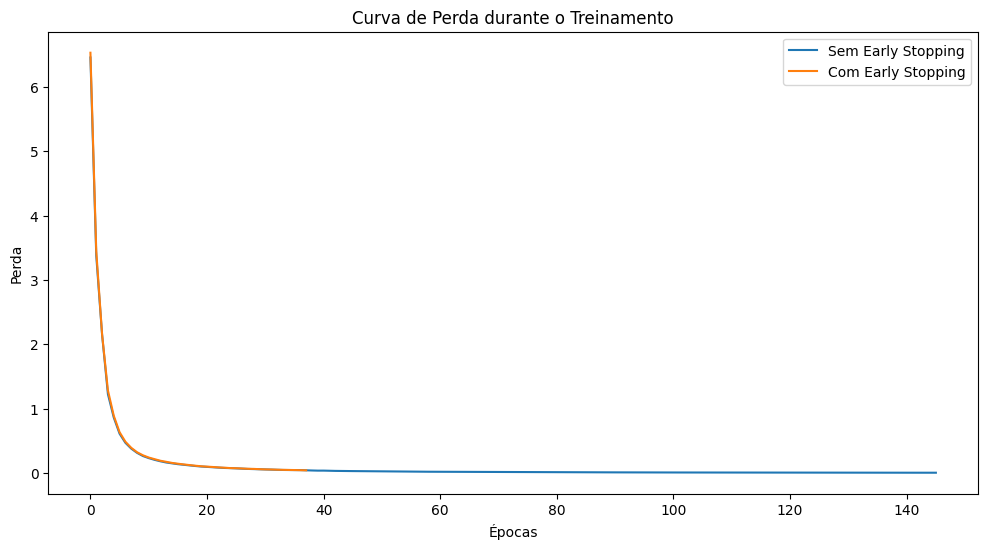

In [10]:
# Plotando a curva de perda
plt.figure(figsize=(12, 6))
plt.plot(model_no_es.loss_curve_, label='Sem Early Stopping')
plt.plot(model_es.loss_curve_, label='Com Early Stopping')
plt.title('Curva de Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


## Nos detalhes

O Early Stopping atua como uma técnica de regularização ao:

- Controlar a complexidade do modelo
- Interromper o treinamento antes que ele comece a overfittar

Embora não seja uma forma de regularização "clássica", seu objetivo e efeito são semelhantes aos das técnicas de regularização tradicionais.

### Benefícios do Early Stopping

1. **Prevenção de Overfitting**
   - Melhora a generalização do modelo
   - Ajuda a encontrar um equilíbrio entre viés e variância

2. **Redução do Tempo e Custo de Treinamento**
   - Economiza recursos computacionais
   - Aumenta a eficiência energética

3. **Simplicidade e Facilidade de Implementação**
   - Suporte nativo em muitas bibliotecas de machine learning
   - Menos hiperparâmetros para ajustar

4. **Melhorias na Estabilidade do Modelo**
   - Resultados mais consistentes entre diferentes execuções
   - Maior reprodutibilidade

5. **Evita Overfitting Tardio**
   - Monitoramento contínuo do desempenho
   - Garante desempenho sustentável em dados novos

6. **Aplicabilidade em Dados Reais e Complexos**
   - Especialmente benéfico em datasets maiores e mais complexos
   - Prepara o modelo para lidar com problemas do mundo real

7. **Economia em Ambientes de Nuvem**
   - Reduz custos em serviços de computação em nuvem
   - Permite otimização do orçamento

8. **Boas Práticas de Machine Learning**
   - Segue o princípio da parcimônia
   - Promove práticas sustentáveis e eficientes

### Análise do Exemplo Específico

Apesar de o modelo sem Early Stopping ter alcançado uma acurácia ligeiramente maior no teste, é importante considerar:

- A diferença de acurácia pode não ser estatisticamente significativa
- O dataset de dígitos é relativamente simples, reduzindo a probabilidade de overfitting significativo
- Em datasets mais complexos, o overfitting é mais provável sem Early Stopping
- Ajustes nos parâmetros de Early Stopping podem levar a resultados diferentes

### Resumo

Embora o Early Stopping possa, em alguns casos, resultar em uma acurácia ligeiramente menor no conjunto de teste, seus benefícios em termos de prevenção de overfitting, economia de recursos e aderência a boas práticas geralmente superam essa desvantagem. Em contextos reais, com datasets maiores e mais complexos, o Early Stopping é uma ferramenta valiosa para garantir que o modelo generalize bem para dados não vistos.

## Referências

1. Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press. Capítulo 7: Regularization for Deep Learning.

2. Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.

3. Yao, Y., Rosasco, L., & Caponnetto, A. (2007). On Early Stopping in Gradient Descent Learning. *Constructive Approximation*, 26(2), 289-315.

4. Prechelt, L. (1998). Early Stopping — But When? In *Neural Networks: Tricks of the Trade* (pp. 55–69). Springer.

5. Geron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. O'Reilly Media.


## Observações

Após analisar os resultados do nosso experimento, podemos destacar duas observações importantes:

1. **Modelo sem Early Stopping:**
   - Pode continuar treinando mesmo após começar a overfittar.
   - Risco de aprender padrões de ruído nos dados de treinamento.

2. **Modelo com Early Stopping:**
   - Para de treinar quando a performance na validação não melhora.
   - Ajuda a evitar overfitting ao interromper o treinamento no momento apropriado.

Estas observações demonstram como o Early Stopping pode ser uma ferramenta eficaz para melhorar a generalização do modelo e prevenir o overfitting, atuando de forma similar a outras técnicas de regularização.


## Conclusão

O Early Stopping atua como uma técnica de regularização ao:

- Controlar a complexidade do modelo
- Interromper o treinamento antes que ele comece a overfittar

Embora não seja uma forma de regularização "clássica", seu objetivo e efeito são semelhantes aos das técnicas de regularização tradicionais.

## Referências

1. Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press. Capítulo 7: Regularization for Deep Learning.

2. Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.

3. Yao, Y., Rosasco, L., & Caponnetto, A. (2007). On Early Stopping in Gradient Descent Learning. *Constructive Approximation*, 26(2), 289-315.

4. Prechelt, L. (1998). Early Stopping — But When? In *Neural Networks: Tricks of the Trade* (pp. 55–69). Springer.

5. Geron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. O'Reilly Media.